# Tests for Build_OBM
This file is meant to test out individual code before scripting in the main repo. Do not use for running the occupant behavior model.

## Import packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
import csv
import pickle
from tools_ipynb import *
import pathlib

## ecobee data

## Read data

In [ ]:
# Read a DyD file
df = pd.read_csv("C:/devel/Build_OBM/data/home_1.csv")
df.head(3)

## Preprocessing data

In [ ]:
# varInfo_1 = {'Unnamed: 0': 'DateTime' ,'Event': 'event' ,'Humidity': 'hum' ,'HumidityExpectedHigh': 'humExpHi' ,'HumidityExpectedLow': 'humExpLo' ,'RH_out': 'RH_out' ,'Remote_Sensor_1_Motion': 'RS1Mo' ,'Remote_Sensor_1_Temperature [oF]': 'RS1T' ,'Remote_Sensor_2_Motion': 'RS2Mo' ,'Remote_Sensor_2_Temperature [oF]': 'RS2T','Remote_Sensor_3_Motion': 'RS3Mo' ,'Remote_Sensor_3_Temperature [oF]': 'RS3T' ,'Remote_Sensor_4_Motion': 'RS4Mo' ,'Remote_Sensor_4_Temperature [oF]': 'RS4T' ,'Remote_Sensor_5_Motion': 'RS5Mo' ,'Remote_Sensor_5_Temperature [oF]': 'RS5T' ,'Remote_Sensor_6_Motion': 'RS6Mo' ,'Remote_Sensor_6_Temperature [oF]': 'RS6T' ,'Remote_Sensor_7_Motion': 'RS7Mo' ,'Remote_Sensor_7_Temperature [oF]': 'RS7T' ,'Remote_Sensor_8_Motion': 'RS8Mo' ,'Remote_Sensor_8_Temperature [oF]': 'RS8T','Remote_Sensor_9_Motion': 'RS9T' ,'Remote_Sensor_9_Temperature [oF]': 'RS9Mo' ,'Remote_Sensor_10_Motion': 'RS10T' ,'Remote_Sensor_10_Temperature [oF]': 'RS10Mo' ,'Remote_Sensor_11_Motion': 'RS11T' ,'Remote_Sensor_11_Temperature [oF]': 'RS11Mo' ,'Remote_Sensor_12_Motion': 'RS12T' ,'Remote_Sensor_12_Temperature [oF]': 'RS12Mo' ,'Remote_Sensor_13_Motion': 'RS13T' ,'Remote_Sensor_13_Temperature [oF]': 'RS13Mo' ,'Schedule': 'schedule' ,'T_ctrl [oF]': 'T_ctrl' ,'T_out [oF]': 'T_out' ,'T_stp_cool [oF]': 'T_stp_cool' ,'T_stp_heat [oF]': 'T_stp_heat' ,'Thermostat_Motion': 'TSMo' ,'Thermostat_Temperature [oF]': 'TST' ,'auxHeat1 [sec]': 'auxHeat1' ,'auxHeat2 [sec]': 'auxHeat2' ,'auxHeat3 [sec]': 'auxHeat3' ,'compCool1 [sec]': 'cmpCool1' ,'compCool2 [sec]': 'cmpCool2' ,'compCool3 [sec]': 'cmpCool3' ,'compHeat1 [sec]': 'cmpHeat1' ,'compHeat2 [sec]': 'cmpHeat2' ,'compHeat3 [sec]': 'cmpHeat3' ,'dehumidifier': 'dehumidifier','fan [sec]': 'fan' ,'humidifier': 'humidifier' ,'ventilator': 'ventilator'}
varInfo = { 'Header in CSV':['Unnamed: 0', 'Event','Humidity', 'HumidityExpectedHigh', 'HumidityExpectedLow','RH_out','Remote_Sensor_1_Motion','Remote_Sensor_1_Temperature [oF]','Remote_Sensor_2_Motion','Remote_Sensor_2_Temperature [oF]','Remote_Sensor_3_Motion','Remote_Sensor_3_Temperature [oF]',
'Remote_Sensor_4_Motion', 'Remote_Sensor_4_Temperature [oF]', 'Remote_Sensor_5_Motion', 'Remote_Sensor_5_Temperature [oF]', 'Remote_Sensor_6_Motion', 'Remote_Sensor_6_Temperature [oF]', 'Remote_Sensor_7_Motion', 'Remote_Sensor_7_Temperature [oF]', 'Remote_Sensor_8_Motion', 'Remote_Sensor_8_Temperature [oF]',
'Remote_Sensor_9_Motion', 'Remote_Sensor_9_Temperature [oF]', 'Remote_Sensor_10_Motion', 'Remote_Sensor_10_Temperature [oF]', 'Remote_Sensor_11_Motion', 'Remote_Sensor_11_Temperature [oF]', 'Remote_Sensor_12_Motion', 'Remote_Sensor_12_Temperature [oF]', 'Remote_Sensor_13_Motion', 'Remote_Sensor_13_Temperature [oF]',
'Schedule', 'T_ctrl [oF]', 'T_out [oF]', 'T_stp_cool [oF]', 'T_stp_heat [oF]', 'Thermostat_Motion', 'Thermostat_Temperature [oF]', 'auxHeat1 [sec]', 'auxHeat2 [sec]', 'auxHeat3 [sec]', 'compCool1 [sec]', 'compCool2 [sec]', 'compCool3 [sec]', 'compHeat1 [sec]', 'compHeat2 [sec]', 'compHeat3 [sec]', 'dehumidifier', 'fan [sec]',
'humidifier', 'ventilator'],
 'VariableName':['DateTime', 'event', 'hum', 'humExpHi','humExpLo' ,'RH_out' ,'RS1Mo' ,'RS1T' ,'RS2Mo' ,'RS2T' ,'RS3Mo' ,'RS3T' ,'RS4Mo' ,'RS4T' ,'RS5Mo' ,'RS5T' ,'RS6Mo' ,'RS6T' ,'RS7Mo' ,'RS7T' ,'RS8Mo' ,'RS8T',
 'RS9Mo', 'RS9T' ,'RS10Mo' ,'RS10T' ,'RS11Mo' ,'RS11T' ,'RS12Mo' ,'RS12T' ,'RS13Mo' ,'RS13T' ,'schedule' ,'T_ctrl' ,'T_out' ,'T_stp_cool' ,'T_stp_heat' ,'TSMo' ,'TST' ,'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' ,'dehumidifier' ,'fan' ,'humidifier' ,'ventilator'],
 'Type':['datetime', 'categorical', 'double', 'double','float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'categorical' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float' ,'float'],
 'Unit':['', '', '%', '%','%' ,'%' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'' ,'oF' ,'oF' ,'oF' ,'oF' ,'' ,'F' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'s' ,'' ,'s' ,'' ,''],
 'Description':['Date and time that the reading was taken', 'Anything that modifies the schedule (e.g. A temperature hold, demand response event, Vacation, SmartRecovery feature)',
                'Indoor humidity (in RH%)', 'Setpoint (for users who have a Humidifier) (in RH%)','Setpoint (for users who have a Humidifier) (in RH%)' ,'' ,'Detects motion (binary) at that date/time at the remote sensor 1' ,'Indoor temperature measurement at the remote sensor 1' ,'Detects motion (binary) at that date/time at the remote sensor 2' ,'Indoor temperature measurement at the remote sensor 2' ,'Detects motion (binary) at that date/time at the remote sensor 3' ,'Indoor temperature measurement at the remote sensor 3' ,'Detects motion (binary) at that date/time at the remote sensor 4' ,'Indoor temperature measurement at the remote sensor 4' ,'Detects motion (binary) at that date/time at the remote sensor 5' ,'Indoor temperature measurement at the remote sensor 5' ,'Detects motion (binary) at that date/time at the remote sensor 6' ,'Indoor temperature measurement at the remote sensor 6' ,'Detects motion (binary) at that date/time at the remote sensor 7' ,'Indoor temperature measurement at the remote sensor 7' ,'Detects motion (binary) at that date/time at the remote sensor 8' ,'Indoor temperature measurement at the remote sensor 8' ,'Detects motion (binary) at that date/time at the remote sensor 9' ,'Indoor temperature measurement at the remote sensor 9' ,'Detects motion (binary) at that date/time at the remote sensor 10' ,'Indoor temperature measurement at the remote sensor 10' ,'Detects motion (binary) at that date/time at the remote sensor 11' ,'Indoor temperature measurement at the remote sensor 11' ,'Detects motion (binary) at that date/time at the remote sensor 12' ,'Indoor temperature measurement at the remote sensor 12' ,'Detects motion (binary) at that date/time at the remote sensor 13' ,'Indoor temperature measurement at the remote sensor 13' ,'Fields include things like Vacation, Sleep, Away, Nap, etc. which are user-defined descriptors for desired set points against activity/behaviour' ,'Average indoor temperature based on relevant sensors as defined by the schedule or mode the user is in' ,'Outdoor temperate for nearest weather station' ,'Indoor cool setpoint' ,'Indoor heat setpoint' ,'Detects motion (binary) at that date/time' ,'Indoor measurement at the thermostat (I.e. Not remote sensor)' ,'Runtime (seconds) of stage 1 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 2 of any heat source other than a heat pump' ,'Runtime (seconds) of stage 3 of any heat source other than a heat pump' ,'Runtime (seconds) for any cooling stage 1' ,'Runtime (seconds) for any cooling stage 2' ,'Runtime (seconds) for any cooling stage 3' ,'Runtime (seconds) for stage 1 of heat-pumps used in heating' ,'Runtime (seconds) for stage 2 of heat-pumps used in heating' ,'Runtime (seconds) for stage 3 of heat-pumps used in heating' ,'' ,'Runtime (seconds) for fan' ,'' ,'']}
df_var = pd.DataFrame.from_dict(varInfo)
df_var.set_index('Header in CSV',inplace=True)
columns2replace = df_var['VariableName'].to_dict()
df = df.rename(columns=columns2replace)
df.columns


Reduce the number of columns:

In [ ]:
# Add motion column that aggregates all motion data into a boolean value
def agg_data(columns,row):
    return row[columns].any()

motion_colmns =[x for x in df.columns if 'Mo' in x]
df['mo'] = df.apply(lambda row: agg_data(motion_colmns,row), axis=1)
heating_equip_columns = ['auxHeat1' ,'auxHeat2' ,'auxHeat3','cmpHeat1' ,'cmpHeat2' ,'cmpHeat3']
cooling_equip_columns = ['cmpCool1' ,'cmpCool2' ,'cmpCool3']
heat_colmns = [x for x in df.columns if x in heating_equip_columns]
cool_colmns = [x for x in df.columns if x in cooling_equip_columns]

# 'auxHeat1' ,'auxHeat2' ,'auxHeat3' ,'cmpCool1' ,'cmpCool2' ,'cmpCool3' ,'cmpHeat1' ,'cmpHeat2' ,'cmpHeat3' 
df['equip_run_heat'] = df.apply(lambda row: agg_data(heat_colmns,row), axis=1)
df['equip_run_cool'] = df.apply(lambda row: agg_data(cool_colmns,row), axis=1)
# Change string series to datetime series
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['schedule'] = df['schedule'].astype("category")
df['event'] = df['event'].astype("category")
df_new = df.copy()
cols_2_keep = ['DateTime', 'schedule', 'event', 'T_ctrl', 'T_stp_cool', 'T_stp_heat',
       'hum', 'T_out', 'equip_run_heat','equip_run_cool', 'fan','mo']
df_new.drop(df_new.columns.difference(cols_2_keep), 1, inplace=True)
df.head()

### Save/read to/from hdf5 format for easy load

In [ ]:
df_new.to_hdf('sample_data1.h5', key='df_new', mode='w',format="table")
del [[df,df_new]]
gc.collect()

In [ ]:
df_read = pd.read_hdf('sample_data1.h5')
df_read.head()

## EDA: Visualize setpoint data prior to cleaning 

In [ ]:
s_idx = 0
e_idx = 100
f,axes = plt.subplots(3,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_out'],label='T_out',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['mo'],label='heat_equip', ax=axes[2])


In [ ]:
def smooth_setpoints(df,column):
    idx_DSP = df[df[column].diff() != 0].index.values
    idx_DSP_diff = np.diff(idx_DSP)
    idxes_2_begin = []
    idxes_2_end = []
    temp_idx = -1
    # Iterate over the difference of index values were dsp was found
    for idx, diff_value in enumerate(idx_DSP_diff):
        if idx <= temp_idx:
            continue
        
        # If the DSPs exists closely
        if diff_value < 3:

            idx_2_begin = idx_DSP[idx]
            idx_2_end = idx_DSP[idx+1]
            # Scan when the last consecutive DSP occurs
            for next_idx, next_idx_diff in enumerate(idx_DSP_diff[idx+1:]):
                if next_idx_diff <2:
                    idx_2_end = idx_DSP[idx+next_idx+2]
                    temp_idx = idx + next_idx + 1
                else:
                    break

            idxes_2_begin.append(idx_2_begin)
            idxes_2_end.append(idx_2_end)

    print(f"Starting and ending indices list differ by {len(idxes_2_begin)-len(idxes_2_end)}")
    return idxes_2_begin, idxes_2_end

In [ ]:
stp_colmns = ['T_stp_cool', 'T_stp_heat']
for colm in stp_colmns:
    idxes_2_begin, idxes_2_end = smooth_setpoints(df_read,colm)
    for idx in range(0,len(idxes_2_begin)):
        start_idx = idxes_2_begin[idx]
        end_idx = idxes_2_end[idx]
        
        df_read.loc[start_idx:end_idx,colm] = df_read.iloc[end_idx][colm]

## EDA: Visualize setpoint data after stepoint smoothing

In [ ]:
s_idx = 0
e_idx = 288
f,axes = plt.subplots(2,1)
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_cool'],label='cool', ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_stp_heat'],label='heat',ax = axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['T_ctrl'],label='T_in',ax=axes[0])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_cool'],label='cool_equip',ax =axes[1])
sns.lineplot(x=df_read.loc[s_idx:e_idx]['DateTime'],y=df_read.loc[s_idx:e_idx]['equip_run_heat'],label='heat_equip', ax=axes[1])

## Save smooth data seperately

In [ ]:
df_read.to_hdf('sample_data1_stp_processed.h5', key='df_read', mode='w',format="table")

## ML

### Routine based habitual overrides
Create a weekday dataframe specifically for extracting transition matrices 

In [ ]:
df_read['mdsp'] = (df_read['T_stp_heat'].diff() != 0) | (df_read['T_stp_cool'].diff() != 0) & (df_read['event'] == 'Hold')
df_read['dsp'] = (df_read['T_stp_heat'].diff() != 0) | (df_read['T_stp_cool'].diff() != 0)
weekday_df = df_read.loc[df_read.DateTime.dt.weekday < 5].copy()
weekend_df = df_read.loc[df_read.DateTime.dt.weekday > 5].copy()

##### Extract transition matrices from the data

In [ ]:
TM = []
for timestep in range(1,289):
    TM.append([timestep, 0, 0, 0])
    TM.append([timestep, 1, 0, 0])

TM = pd.DataFrame(TM,columns=['time','cur_state','p_2_0','p_2_1'])
TM = extract_TM_DyD(TM, weekday_df, df_read)
TM.to_csv('TM_habitual.csv',index=False)
TM

##### Load 2nd order Markov model TMs from MATLAB output

In [ ]:
TM_cool_wd = pd.read_csv("C:\devel\ecobee_mental_models\data\TMs\cool_wd.csv")
TM_cool_we = pd.read_csv("C:\devel\ecobee_mental_models\data\TMs\cool_we.csv")
TM_heat_wd = pd.read_csv("C:\devel\ecobee_mental_models\data\TMs\heat_wd.csv")
TM_heat_we = pd.read_csv("C:\devel\ecobee_mental_models\data\TMs\heat_we.csv")
TMs = {'cool_wd':TM_cool_wd, 'cool_we':TM_cool_we, 'heat_wd':TM_heat_wd, 'heat_we':TM_heat_we}

In [ ]:
TMs['cool_we'],TMs['cool_wd']

In [ ]:
timestep = 1
current_state = 0
prev_state = 1

df_TM.loc[(df_TM['timestep'] == timestep + 1) & (df_TM['prev_state'] == prev_state) & (df_TM['cur_state'] == current_state), 'p_2_0':'p_2_1'].values[0]


In [ ]:
x = om_tools.datetime.datetime(2019, 1, 1, 0, 0, 0)

### Discomfort based override model

### Random forest classification model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

y = weekday_df['mdsp'].copy()
X = weekday_df.drop('mdsp',axis=1).copy()
X = X.drop(['DateTime','schedule','event','dsp','fan'],axis=1)
print(X.columns)
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)
clf=RandomForestClassifier()
clf.fit(training.values, training_labels.values)
preds = clf.predict(testing.values)
print(f"Training score: {clf.score(training.values, training_labels.values)}")
print(f"Testing score: {clf.score(testing.values, testing_labels.values)}")
print(f"F1 score: {f1_score(testing_labels,preds)}")


Save classification model

In [ ]:
with open('model_classification.pkl','wb') as f:
    pickle.dump(clf,f)

### Random forest regression model to predict time to override

In [ ]:
# Find time to setpoint change for all dsps
time_2_stp_change = np.diff(df_read.index[df_read.dsp == True]).tolist()
time_2_stp_change.append(np.nan)
time_2_stp_change = [item*5 for item in time_2_stp_change]

df_read['mins_to_msc'] = np.nan*len(df_read)
df_read.loc[df_read.index[df_read.dsp == True],'mins_to_msc'] = time_2_stp_change
df_2hr_override = df_read.loc[df_read['mins_to_msc']<120].copy()
# habitual model uses datetime as an input so ignoring these features here
# df_2hr_override['year'] = df_read.DateTime.dt.year
# df_2hr_override['day'] = df_read.DateTime.dt.day
# df_2hr_override['hour'] = df_read.DateTime.dt.hour
# df_2hr_override['day_of_week'] = df_read.DateTime.dt.weekday
df_2hr_override = df_2hr_override.drop(['DateTime','schedule', 'event','fan'],axis=1)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(df_2hr_override)
features.columns

In [ ]:
labels = features['mins_to_msc']
features = features.drop(['mins_to_msc','dsp','mdsp'],axis=1)
# Saving feature names for later use
feature_list = list(features.columns)
print(feature_list)
# Convert to numpy array
features = np.array(features)

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)# Calculate the absolute errors
errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes')
# Calculate mean absolute percentage error (MAPE)
from sklearn.metrics import mean_squared_error
print('RMSE:', mean_squared_error(test_labels,predictions,squared=False))

In [ ]:
feature_list

Save regressor model

In [ ]:
# save
with open('model_regressor.pkl','wb') as f:
    pickle.dump(rf,f)

In [ ]:
rf.predict(test_features[0].reshape(1,-1))

In [ ]:
test_features[0]

In [ ]:
df_read

## Other Tests

In [ ]:
import os
import sys
sys.path.append(os.path.dirname(__file__))
print(sys.path)

In [ ]:
import datetime

In [ ]:
x = datetime.datetime(2019, 1, 1, 0, 0, 0)
x

In [ ]:
x.hour

In [ ]:
x.minute

In [ ]:
(x + datetime.timedelta(minutes=30)).minute

# Import and implement mscpd

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gc
import csv
import pickle
from tools_ipynb import *
import pathlib
import datetime
mscpd_dir = pathlib.Path("C:\devel\Build_OBM\input_data\csv").resolve()
cd = datetime.datetime(2019, 1, 1, 0, 0, 0)

In [ ]:
files = list(mscpd_dir.iterdir())
files

In [ ]:
init_data = {}
for file in files:
    init_data[file.stem] = pd.read_csv(file)


In [ ]:
# sorted(init_data, key=len, reverse=False)
list(init_data.keys())

In [ ]:
label = 'heat_wd'
season_label = 'heat'
N = init_data[label+'_Nmscpd']['N'].values
prob = init_data[label+'_Nmscpd']['prob'].values
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

N_mscpd = np.random.choice(N, p = prob)
N_mscpd = 2

In [ ]:
# Realize the time of first msc i.e. t_msc_1
tod = init_data[label + '_' + str(N_mscpd) + 'mscpd_tod1']['tod'].values
prob = init_data[label + '_' + str(N_mscpd) + 'mscpd_tod1']['prob'].values
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

t_msc_1 = np.random.choice(tod, p = prob)
t_msc_1

In [ ]:
# Realize the type of first msc i.e. type_msc_1
types_1 = init_data[label + '_' + str(N_mscpd) + 'mscpd_type1']['types'].values
prob = init_data[label + '_' + str(N_mscpd) + 'mscpd_type1']['prob'].values
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

type_1 = np.random.choice(types_1, p = prob)
type_1

In [ ]:
# Realize the degree of first msc i.e. DOMSC_1 given time and type of first msc i.e. t_msc_1 and type_1 
data = init_data[label + '_' + str(N_mscpd) + 'mscpd_'+ season_label + '_DOO1_'+ type_1 +'_type']
DOMSCs_1 = np.array(data.columns[1:]).astype(int)
prob = np.array(data.loc[data['tod'] == t_msc_1].values[0][1:]).astype(float)
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

domsc_1 = np.random.choice(DOMSCs_1, p = prob)
domsc_1

In [ ]:
data.loc[data['tod'] == t_msc_1]

In [ ]:
# Realize the time of second msc i.e. t_msc_2 given the time of first msc i.e., t_msc_1
data = init_data[label + '_' + str(N_mscpd) + 'mscpd_tod2_tod1']
tod_2 = init_data[label + '_' + str(N_mscpd) + 'mscpd_tod2_tod1']['tod']
prob = np.array(data.loc[data.tod == t_msc_1].values[0][1:]).astype(float)
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

t_msc_2 = np.random.choice(tod_2, p = prob)
t_msc_2

In [ ]:
# Realize the type of second msc i.e. type_msc_2 given the type of first msc i.e. type_1
types_2 = init_data[label + '_' + str(N_mscpd) + 'mscpd_type2_type1_' + type_1]['types'].values
prob = init_data[label + '_' + str(N_mscpd) + 'mscpd_type2_type1_' + type_1]['prob'].values
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

type_2 = np.random.choice(types_2, p = prob)
type_2

In [ ]:
# Realize the degree of second msc i.e. DOO_msc_2 given the type and degree of first msc and type of second msc i.e. type_1, DOMSC_1, type_2
data = init_data[label + '_' + str(N_mscpd) + 'mscpd_row' + season_label + '_col' + season_label + '_DOO2_' + type_1 + '_type1_' + type_2 + '_type2']
DOMSCs_2 = np.array(data.columns[1:]).astype(int)
prob = np.array(data.loc[data['doo'] == DOMSC_1].values[0][1:]).astype(float)
if np.sum(prob) != 1:
    diff = abs(1 - np.sum(prob))
    prob[0] = prob[0] + diff

domsc_2 = np.random.choice(DOMSCs_2, p = prob)
domsc_2

In [ ]:
routine_msc_schedule = pd.DataFrame([], columns=['TOD','delT_cool','delT_heat'])
routine_msc_schedule

In [ ]:
season = 'heat'
if season == 'cool':
    routine_msc_schedule.TOD = [t_msc_1,t_msc_2]
    routine_msc_schedule.delT_cool = [domsc_1,domsc_2]
    routine_msc_schedule.delT_heat = [0,0]
    routine_msc_schedule.TOD = pd.to_datetime(routine_msc_schedule.TOD, format='%H:%M:%S').dt.time
    
elif season == 'heat':
    routine_msc_schedule.TOD = [t_msc_1,t_msc_2]
    routine_msc_schedule.delT_cool = [0,0]
    routine_msc_schedule.delT_heat = [domsc_1,domsc_2]
    routine_msc_schedule.TOD = pd.to_datetime(routine_msc_schedule.TOD, format='%H:%M:%S').dt.time

routine_msc_schedule

In [ ]:
routine_msc_schedule.TOD.values

In [ ]:
routine_msc_schedule.TOD == cd.time()

In [ ]:
datetime.datetime(2019, 1, 1, 10, 40, 0):datetime.timedelta('minutes'=5):datetime.datetime(2019, 1, 1, 23, 59, 0)

In [ ]:
from datetime import datetime, timedelta
np.arange(cd, cd+timedelta(hours=24), timedelta(minutes=1)).astype(datetime)

In [ ]:
cd.time() = 

In [ ]:
pd.to_datetime([t_msc_1,t_msc_2], format='%H:%M:%S').time

In [ ]:
datetime.combine([cd.date(), cd.date()], pd.to_datetime([t_msc_1,t_msc_2], format='%H:%M:%S').time)

In [ ]:
datetime.combine(cd.date(),pd.to_datetime(t_msc_1, format='%H:%M:%S').time())

In [ ]:
import datetime
datetime.datetime.combine(cd.date(),pd.to_datetime(t_msc_1, format='%H:%M:%S').time())


In [ ]:
x = np.arange(cd, cd+datetime.timedelta(hours=24), datetime.timedelta(minutes=5)).astype(datetime.datetime)
# occupancy = np.random.choice(x,100)
# occupancy
type(x[0])

In [ ]:
occupancy[0]

In [ ]:
# Realize the time of first msc i.e. t_msc_1
t_msc_1=None
while t_msc_1 not in occupancy:
    # Realize the time of first msc i.e. t_msc_1
    data = init_data[label + '_' + str(N_mscpd) + 'mscpd_tod1']
    tod_1 = data['tod'].values
    prob = data['prob'].values
    if np.sum(prob) != 1:
        diff = abs(1 - np.sum(prob))
        prob[0] = prob[0] + diff
    t_msc_1 = datetime.datetime.combine(cd.date(), pd.to_datetime(np.random.choice(tod_1, p = prob), format='%H:%M:%S').time())
t_msc_1

In [ ]:
any(t_msc_1 == occupancy)

In [ ]:
t_msc_1 == occupancy 

In [ ]:
t_msc_1

In [ ]:
occupancy[0]

In [ ]:
t_msc_1 not in occupancy

In [ ]:
x = pd.DataFrame([], columns=['TOD','delT_cool','delT_heat'])
x

In [ ]:
x.TOD = [t_msc_1,t_msc_1]

In [ ]:
x.set_index(

In [ ]:
x.TOD.values

In [ ]:
x.TOD = pd.Series(x.TOD.dt.to_pydatetime(),dtype='object')

# Importing matlab files

In [1]:
import pathlib
import scipy.io
import numpy as np
import h5py
import pandas as pd
import datetime

## Comfort dataset

In [2]:
def save_mat_2_pickle_comf(filepath):
    # filepath = pathlib.Path('C:/devel/ecobee_mental_models/data/comf_Occup1_30_min_filter_py.mat').resolve()
    mat = scipy.io.loadmat(file)
    columns = []
    total_n_homes = len(mat['comfCellLabels_py'])
    df = pd.DataFrame([])
    vec_clms = ['T_ctrl_vec', 'T_stp_cool_vec', 'T_stp_heat_vec', 'T_tst_vec', 'T_out_vec','hum_vec']
    duration_clms =  ['len','occDt_b4dsp','prevLen']
    categorical_clms = ['event', 'schedule','prevSchedule','StpTransition','prevEvent']
    datetime_clms = ['DateTime']
    for home_n in range(0,total_n_homes):
        if home_n%100 == 0:
            print(home_n, end=',')
        home_ID = mat['comfIDs_py'][home_n]
        temp_data = {}

        # Skip if no datetime values exist for a home
        if len(mat['comfCells_py'][home_n][0][0][0]) == 0:
            continue

        for column_n in range(0, len(mat['comfCellLabels_py'][home_n][0][0])):
            column_name = mat['comfCellLabels_py'][home_n][0][0][column_n][0]

            if column_name in datetime_clms + categorical_clms + duration_clms + vec_clms:
                if column_name in datetime_clms:
                    temp_data[column_name] = pd.to_datetime(mat['comfCells_py'][home_n][0][0][column_n])
                elif column_name in categorical_clms:
                    temp_data[column_name] = [i.replace(" ","") for i in mat['comfCells_py'][home_n][0][0][column_n]]
                elif column_name in duration_clms:
                    temp_data[column_name] = []
                    for item in mat['comfCells_py'][home_n][0][0][column_n]:
                        if str(type(item)) == "<class 'numpy.str_'>":
                            if item.replace(' ','').lower() == 'nan':
                                item = float("nan")
                            else:
                                item = int(item.replace(' ','').split(':')[0])*60 + int(item.replace(' ','').split(':')[1])
                        elif str(type(item)) == "<class 'numpy.ndarray'>":
                            item = mat['comfCells_py'][home_n][0][0][column_n][0][0]
                        else:
                            raise ValuError('check dtype')
                        temp_data[column_name].append(item)                    
                elif column_name in vec_clms:
                    temp_data[column_name] = [np.asarray([float('nan') if len(item) == 0 else item[0] for item in msc[0]], dtype=np.float32) for msc in mat['comfCells_py'][home_n][0][0][column_n]]
                else:
                    print('Datatype not found')
            else:
                temp_data[column_name] = [float(i[0]) for i in mat['comfCells_py'][home_n][0][0][column_n]]
        temp_data['ID'] = home_ID
        temp_data = pd.DataFrame.from_dict(temp_data)        
        df = pd.concat([df,temp_data], axis=0, ignore_index=True)
    print(df.memory_usage())
    df.to_pickle("./comf_df.pkl")
    
    
df_comf =pd.read_pickle("./comf_df.pkl")
df_comf_tf = df_comf[['DateTime','T_ctrl', 'T_stp_cool', 'T_stp_heat','TST', 'mo', 'len', 'occDt_b4dsp', 'prevT_ctrl','total_occup_mins',
            'prevT_stp_sc_cool', 'prevT_stp_sc_heat', 'prevT_ctrl_sc', 'prevT_stp_cool', 'prevT_stp_heat', 'StpTransition', 'T_ctrl_vec','ID']].copy()
filter = (df_comf_tf.T_stp_cool  - df_comf_tf.prevT_stp_cool < 0) & (~df_comf_tf['occDt_b4dsp'].isnull()) & (df_comf_tf.StpTransition.values == 'Cool2Cool')
df_comf_tf_cool = df_comf_tf.loc[filter].reset_index().copy()
TF = []
T_c = df_comf_tf_cool['T_ctrl'].mean()
for index,row in df_comf_tf_cool.iterrows():
    # T_c = row['prevT_stp_sc_cool']
    T_in = row['T_ctrl_vec']
    a = 1
    b = 1
    tf_1 = 0
    for k in range(0,len(T_in)):
        if k == 0:
            tf_1 = 0
        else:
            tf_1 = a*tf_1 + b*(T_in[k] - T_c)
    TF.append(tf_1)
df_comf_tf_cool['TF'] = TF
df_comf_tf_cool

,index,DateTime,T_ctrl,T_stp_cool,T_stp_heat,TST,mo,len,occDt_b4dsp,prevT_ctrl,total_occup_mins,prevT_stp_sc_cool,prevT_stp_sc_heat,prevT_ctrl_sc,prevT_stp_cool,prevT_stp_heat,StpTransition,T_ctrl_vec,ID,TF
0,114,2017-07-07 03:25:00,67.8,65.5,60.5,58.1,0.1,240,10,72.8,150.0,86.0,63.0,72.8,86.0,63.0,Cool2Cool,"[73.1, 73.0, 72.7, 72.8, 73.1, 74.1, 74.8, 74....",ID_a978eaa6f3677890c664a6a44940980cb286a1a4,-115.134507
1,119,2017-07-09 03:30:00,68.7,68.5,62.7,61.5,0.0,240,5,73.5,130.0,71.6,64.4,73.5,71.6,64.4,Cool2Cool,"[73.3, 73.0, 72.9, 72.7, 72.5, 72.3, 72.1, 71....",ID_a978eaa6f3677890c664a6a44940980cb286a1a4,-163.834496
2,122,2017-07-10 03:30:00,68.6,68.5,62.7,60.6,0.0,240,5,73.6,50.0,71.6,64.4,73.6,71.6,64.4,Cool2Cool,"[73.5, 73.3, 73.1, 72.9, 72.8, 72.5, 72.5, 72....",ID_a978eaa6f3677890c664a6a44940980cb286a1a4,-153.034493
3,125,2017-07-11 01:00:00,68.5,68.5,62.7,62.1,0.0,240,5,69.3,135.0,70.0,70.0,69.3,70.0,70.0,Cool2Cool,"[68.9, 69.1, 69.5, 69.8, 70.1, 70.3, 69.8, 69....",ID_a978eaa6f3677890c664a6a44940980cb286a1a4,-162.834512
4,128,2017-07-12 02:15:00,68.3,68.2,64.2,65.6,1.0,240,55,70.0,140.0,70.0,66.0,70.0,70.0,66.0,Cool2Cool,"[69.1, 68.3, 67.6, 67.3, 67.3, 67.8, 68.6, 69....",ID_a978eaa6f3677890c664a6a44940980cb286a1a4,-240.934502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25108,123140,2015-02-10 03:30:00,69.5,69.0,65.0,71.8,1.0,240,40,70.3,120.0,70.0,67.0,70.3,70.0,67.0,Cool2Cool,"[69.9, 69.7, 69.7, 69.8, 69.7, 69.5, 69.5, 69....",ID_f6ad6dca277b2d3d790e5777ff0e189e5b69bdf4,-171.834535
25109,123142,2015-02-10 23:20:00,70.0,70.0,67.0,71.1,2.0,240,70,70.1,140.0,80.0,61.0,70.1,80.0,61.0,Cool2Cool,"[69.6, 68.9, 69.0, 69.7, 70.0, 69.7, 69.9, 70....",ID_f6ad6dca277b2d3d790e5777ff0e189e5b69bdf4,-182.534509
25110,123143,2015-02-11 03:30:00,71.4,69.0,65.0,71.6,1.0,240,320,70.2,245.0,70.0,67.0,70.2,70.0,67.0,Cool2Cool,"[70.0, 70.3, 70.5, 70.0, 70.3, 70.6, 70.2, 70....",ID_f6ad6dca277b2d3d790e5777ff0e189e5b69bdf4,-129.634484
25111,123145,2015-02-11 23:30:00,69.4,69.0,65.0,70.4,1.0,240,100,71.0,105.0,80.0,61.0,71.0,80.0,61.0,Cool2Cool,"[71.1, 71.0, 70.9, 70.6, 70.4, 70.1, 69.7, 69....",ID_f6ad6dca277b2d3d790e5777ff0e189e5b69bdf4,-176.334481


## MSC data

In [30]:
def save_mat_2_pickle_msc(filepath):
    file = pathlib.Path('C:\devel\ecobee_mental_models\data\mdsp_Occup1v10_occupB4prevDSP(30 min-Occup_filter)AfterprevLenbug_T_ctrlvec_py.mat').resolve()
    mat = scipy.io.loadmat(file)
    total_n_homes = len(mat['mdspCellLabels_py'])
    df = pd.DataFrame([])
    vec_clms = ['T_ctrl_vec', 'T_stp_cool_vec', 'T_stp_heat_vec', 'T_tst_vec', 'T_out_vec']
    duration_clms =  ['len','occDt','occDt_b4dsp','prevLen','nextLen']
    categorical_clms = ['event', 'schedule','type','StpTransition','prevEvent','nextEvent']
    datetime_clms = ['DateTime']

    for home_n in range(0,total_n_homes):
        if home_n%100 == 0:
            print(home_n, end=',')
        home_ID = mat['mdspIDs_py'][home_n]
        temp_data = {}

        # Skip if no datetime values exist for a home
        if len(mat['mdspCells_py'][home_n][0][0][0]) == 0:
            continue

        for column_n in range(0, len(mat['mdspCellLabels_py'][home_n][0][0])):
            column_name = mat['mdspCellLabels_py'][home_n][0][0][column_n][0]

            if column_name in datetime_clms + categorical_clms + duration_clms + vec_clms:
                if column_name in datetime_clms:
                    temp_data[column_name] = pd.to_datetime(mat['mdspCells_py'][home_n][0][0][column_n])
                elif column_name in categorical_clms:
                    temp_data[column_name] = [i.replace(" ","") for i in mat['mdspCells_py'][home_n][0][0][column_n]]
                elif column_name in duration_clms:
                    temp_data[column_name] = []
                    for item in mat['mdspCells_py'][home_n][0][0][column_n]:
                        if str(type(item)) == "<class 'numpy.str_'>":
                            if item.replace(' ','').lower() == 'nan':
                                item = float("nan")
                            else:
                                item = int(item.replace(' ','').split(':')[0])*60 + int(item.replace(' ','').split(':')[1])
                        elif str(type(item)) == "<class 'numpy.ndarray'>":
                            item = mat['mdspCells_py'][home_n][0][0][column_n][0][0]
                        else:
                            raise ValuError('check dtype')
                        temp_data[column_name].append(item)                    
                elif column_name in vec_clms:
                    temp_data[column_name] = [np.asarray([float('nan') if len(item) == 0 else item[0] for item in msc[0]], dtype=np.float32) for msc in mat['mdspCells_py'][home_n][0][0][column_n]]
                else:
                    print('Datatype not found')
            else:
                temp_data[column_name] = [i[0] for i in mat['mdspCells_py'][home_n][0][0][column_n]]
        temp_data['ID'] = home_ID
        temp_data = pd.DataFrame.from_dict(temp_data)        
        df = pd.concat([df,temp_data], axis=0, ignore_index=True)
    print(df.memory_usage())
    df.to_pickle("./mdsp_df.pkl")
    
df_msc =pd.read_pickle("./mdsp_df.pkl")
df_msc_tf = df_msc[['ID','DateTime','T_ctrl', 'T_stp_cool', 'T_stp_heat','TST', 'mo', 'prevLen','len','occDt_b4dsp','prevT_ctrl',
            'prevT_stp_sc_cool', 'prevT_stp_sc_heat', 'prevT_ctrl_sc', 'prevT_stp_cool', 'prevT_stp_heat', 'StpTransition', 'T_ctrl_vec']].copy()
filter = (df_msc_tf.T_stp_cool  - df_msc_tf.prevT_stp_cool < 0) & (~df_msc_tf['occDt_b4dsp'].isnull()) & (df_msc_tf.StpTransition.values == 'Cool2Cool')
df_msc_tf_cool = df_msc_tf.loc[filter].reset_index().copy()
TF = []
T_c = np.mean((df_comf_tf_cool['T_stp_heat']+df_comf_tf_cool['T_stp_cool'])/2)
for index,row in df_msc_tf_cool.iterrows():
    # T_c = row['prevT_stp_sc_cool']
    T_in = row['T_ctrl_vec']
    a = 1
    b = 1
    tf_1 = 0
    for k in range(0,len(T_in)):
        if k == 0:
            tf_1 = 0
        else:
            tf_1 = a*tf_1 + b*(T_in[k] - T_c)
    TF.append(tf_1)
df_msc_tf_cool['TF'] = TF
df_msc_tf_cool

,index,ID,DateTime,T_ctrl,T_stp_cool,T_stp_heat,TST,mo,prevLen,len,occDt_b4dsp,prevT_ctrl,prevT_stp_sc_cool,prevT_stp_sc_heat,prevT_ctrl_sc,prevT_stp_cool,prevT_stp_heat,StpTransition,T_ctrl_vec,TF
0,544,ID_a978eaa6f3677890c664a6a44940980cb286a1a4,2017-07-02 20:50:00,73.6,70.7,65.3,73.7,1.0,80,70.0,-65.0,70.5,70.7,65.3,70.2,82.4,62.6,Cool2Cool,"[70.2, 70.5, 70.8, 71.2, 71.6, 72.1, 72.5, 72....",43.957389
1,545,ID_a978eaa6f3677890c664a6a44940980cb286a1a4,2017-07-02 22:00:00,70.3,63.5,59.0,70.1,0.1,70,5.0,-235.0,73.6,82.4,62.6,73.8,70.7,65.3,Cool2Cool,"[73.8, 73.6, 72.4, 71.0, 70.3, 70.6, 71.0, 71....",11.821231
2,547,ID_a978eaa6f3677890c664a6a44940980cb286a1a4,2017-07-02 22:10:00,69.0,65.0,60.0,67.9,1.0,5,5.0,-225.0,69.9,63.5,59.0,70.3,70.5,65.0,Cool2Cool,"[70.3, 69.9, 69.0]",-1.363835
3,994,ID_ff6ba5c229cd3cb23240924d1a53f3b1cc439b08,2017-07-27 16:00:00,78.1,68.9,68.9,78.2,0.1,570,435.0,-23630.0,72.9,79.7,64.4,72.6,77.9,66.2,Cool2Cool,"[72.6, 72.9, 73.1, 73.2, 73.2, 73.1, 73.1, 73....",538.329417
4,998,ID_ff6ba5c229cd3cb23240924d1a53f3b1cc439b08,2017-08-27 22:00:00,78.0,68.9,66.0,77.0,0.1,5895,5.0,-68630.0,80.8,80.6,66.0,80.9,81.5,66.0,Cool2Cool,"[80.9, 80.8, 80.7, 80.7, 80.7, 80.7, 80.7, 80....",2522.224810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27945,415014,ID_eae066fe20856bcff79d9463e4b25fae827afb2b,2017-03-29 19:25:00,72.0,70.0,67.0,73.1,0.1,5,155.0,15.0,72.0,69.0,72.0,72.0,74.0,65.0,Cool2Cool,"[72.0, 72.0, 72.0]",3.736164
27946,415016,ID_eae066fe20856bcff79d9463e4b25fae827afb2b,2017-04-05 17:15:00,70.8,70.0,67.0,72.9,0.1,100,120.0,-15.0,70.3,76.0,65.0,70.3,72.0,69.0,Cool2Cool,"[70.3, 70.3, 70.3, 70.4, 70.4, 70.5, 70.5, 70....",9.029707
27947,415018,ID_eae066fe20856bcff79d9463e4b25fae827afb2b,2017-04-06 17:45:00,72.0,66.0,66.0,73.0,1.1,130,255.0,-210.0,70.0,70.0,70.0,69.8,72.0,69.0,Cool2Cool,"[69.8, 70.0, 70.0, 70.1, 70.1, 70.1, 70.3, 70....",32.638215
27948,415027,ID_eae066fe20856bcff79d9463e4b25fae827afb2b,2017-04-12 17:55:00,71.5,70.0,67.0,71.5,1.0,35,240.0,-55.0,71.0,70.0,67.0,70.8,72.0,69.0,Cool2Cool,"[70.8, 71.0, 71.1, 71.2, 71.4, 71.4, 71.5, 71....",9.644652


In [10]:
len(df_msc_tf_cool.loc[1,'T_ctrl_vec'])

16

In [ ]:
df_msc_tf_cool

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='T_stp_cool', ylabel='Count'>

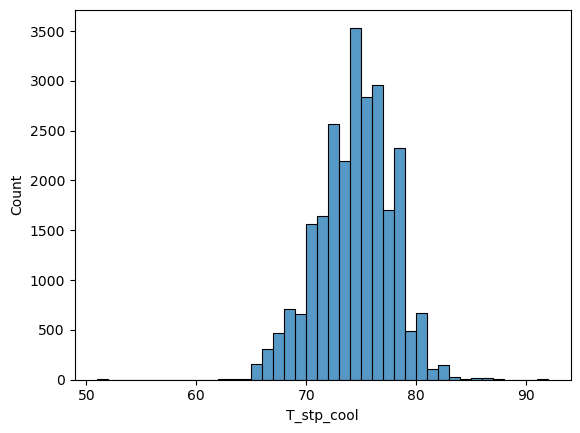

In [15]:
sns.histplot(data = df_comf_tf_cool['T_stp_cool'],binwidth=1)

<AxesSubplot:xlabel='T_stp_heat', ylabel='Count'>

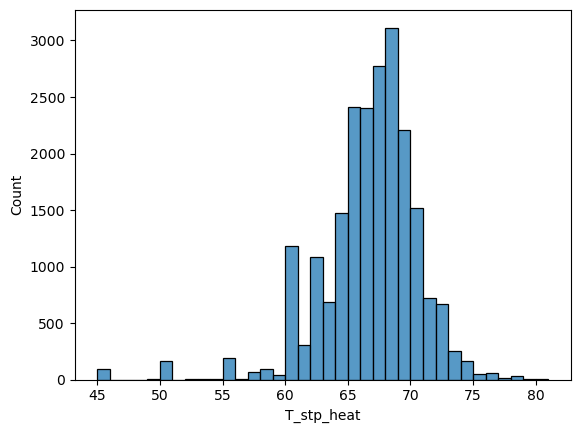

In [17]:
sns.histplot(data = df_comf_tf_cool['T_stp_heat'],binwidth=1)

In [11]:
df_comf_tf_cool['T_ctrl'].mean(),df_comf_tf_cool['T_ctrl'].median(),df_comf_tf_cool['T_ctrl'].mode()

(73.36738556338011,
 73.5,
 0    74.1
 dtype: float64)

<AxesSubplot:ylabel='Count'>

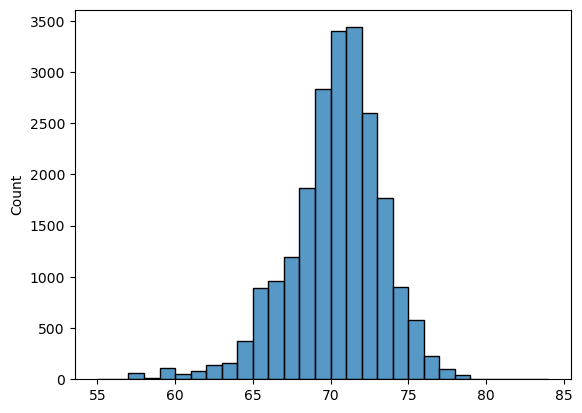

In [33]:
sns.histplot(data = (df_comf_tf_cool['T_stp_heat']+df_comf_tf_cool['T_stp_cool'])/2, binwidth=1)

## Occup_1

In [5]:
filepath = pathlib.Path('D:\devel\ecobee_mental_models\data\Occup_1.mat').resolve()
# Load the .mat file
file = h5py.File(filepath, 'r')
file

<HDF5 file "Occup_1.mat" (mode r)>

In [4]:
import h5py

In [20]:
IDs = list(file['Occup']['Occup_1'].keys())

In [27]:
data = file['Occup']['Occup_1'][IDs[0]]
field_data = data['field_name']
field_data

ValueError: Field names only allowed for compound types

In [45]:
data

<HDF5 dataset "ID_0014db2e4a7bf1182163b9b2b1dd78b735579d1b": shape (1, 6), type "<u4">

In [46]:
data.dtype

dtype('uint32')

In [47]:
data.dtype.names

In [48]:
data.reshape((72108, 20))

AttributeError: 'Dataset' object has no attribute 'reshape'

In [49]:
file['Occup'].visititems(lambda n,o:print(n, o))


Occup_1 <HDF5 group "/Occup/Occup_1" (1411 members)>
Occup_1/ID_0014db2e4a7bf1182163b9b2b1dd78b735579d1b <HDF5 dataset "ID_0014db2e4a7bf1182163b9b2b1dd78b735579d1b": shape (1, 6), type "<u4">
Occup_1/ID_002a2b566262fc03cfac7312850810c22168ce04 <HDF5 dataset "ID_002a2b566262fc03cfac7312850810c22168ce04": shape (1, 6), type "<u4">
Occup_1/ID_003844312b1412c464a57b89e07cf055264fa586 <HDF5 dataset "ID_003844312b1412c464a57b89e07cf055264fa586": shape (1, 6), type "<u4">
Occup_1/ID_00459f8710f5c6814e1522e95fca42988fa65ebd <HDF5 dataset "ID_00459f8710f5c6814e1522e95fca42988fa65ebd": shape (1, 6), type "<u4">
Occup_1/ID_00d9c911b627b0d2a41631fd56823adc982e3667 <HDF5 dataset "ID_00d9c911b627b0d2a41631fd56823adc982e3667": shape (1, 6), type "<u4">
Occup_1/ID_016eb758d93c647fe110f5370d259b4e206cd607 <HDF5 dataset "ID_016eb758d93c647fe110f5370d259b4e206cd607": shape (1, 6), type "<u4">
Occup_1/ID_01a2030bcfac50ce2f96d61e13f86e1ab86a1e3c <HDF5 dataset "ID_01a2030bcfac50ce2f96d61e13f86e1ab86a1e3c": 